# Decision trees and random forest
## Preprocessing

In [1]:
#you first need to download the data from teams and put it in the same folder as this to be able to load the script
#here i load the libraries and set the theme to seaborn
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import datetime
sns.set_theme()

In [2]:
#here i read the csv file and save it in a dataframe
df= pd.read_csv('January_Schiphol_Time_Groups.csv')
df

,Unnamed: 0,Station_Code,Station_Name,Train_Number,Train_Type,Train_Company,Train_Destination_Planned,Train_Destination_Actual,Train_Departure_Planned,Train_Departure_Actual,Train_Delay,MaxNumberOfStops,weekday,day_of_week,Train_Departure_Planned_Time,Time_Group
0,0,HRL,Heerlen,3528,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 06:44:00,2016-01-01 06:44:00,0.0,10,4,Friday,64400,Morning_Rush_Hour
1,1,EHV,Eindhoven,3524,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 06:48:00,2016-01-01 06:48:00,0.0,10,4,Friday,64800,Morning_Rush_Hour
2,2,STD,Sittard,3528,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:00:00,2016-01-01 07:00:00,0.0,10,4,Friday,70000,Morning_Rush_Hour
3,3,DV,Deventer,1624,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:02:00,2016-01-01 07:02:00,0.0,10,4,Friday,70200,Morning_Rush_Hour
4,4,HT,'s-Hertogenbosch,3524,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:09:00,2016-01-01 07:09:00,0.0,10,4,Friday,70900,Morning_Rush_Hour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76310,76310,HVS,Hilversum,1684,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 22:53:00,2016-01-31 22:53:00,0.0,13,6,Sunday,225300,Night
76311,76311,AMF,Amersfoort,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:10:00,2016-01-31 23:10:00,0.0,6,6,Sunday,231000,Night
76312,76312,DVD,Duivendrecht,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:40:00,2016-01-31 23:40:00,0.0,6,6,Sunday,234000,Night
76313,76313,ASDZ,Amsterdam Zuid,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:46:00,2016-01-31 23:46:00,0.0,6,6,Sunday,234600,Night


In [3]:
#here i make dummies from the different station names so i can use it for the random forest and decision trees algerithms
StationDummies=pd.get_dummies(df['Station_Name'])
StationDummies

,'s-Hertogenbosch,Almelo,Almere Centrum,Amersfoort,Amersfoort Schothorst,Amsterdam Bijlmer ArenA,Amsterdam RAI,Amsterdam Zuid,Apeldoorn,Apeldoorn Osseveld,...,Schiphol Airport,Sittard,Twello,Utrecht Centraal,Utrecht Overvecht,Veenendaal-De Klomp,Weert,Wierden,Wolfheze,Zaltbommel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76311,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76313,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#i also do this for the days of the week
DayDummies=pd.get_dummies(df['day_of_week'])
DayDummies

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
76310,0,0,0,1,0,0,0
76311,0,0,0,1,0,0,0
76312,0,0,0,1,0,0,0
76313,0,0,0,1,0,0,0


In [5]:
#for the time groups 
TimeDummies=pd.get_dummies(df['Time_Group'])
TimeDummies

,Afternoon_Rush_hour,Between_Rush_hours,Early_Morning,Morning_Rush_Hour,Night
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
76310,0,0,0,0,1
76311,0,0,0,0,1
76312,0,0,0,0,1
76313,0,0,0,0,1


In [6]:
# an also for the train types
TrainDummies=pd.get_dummies(df['Train_Type'])
TrainDummies

,Extra trein,Intercity,Sprinter
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
76310,0,1,0
76311,0,1,0
76312,0,1,0
76313,0,1,0


In [7]:
#then i add all those dataframes with the dummies to the dataset
FinalDF=pd.concat([df, StationDummies, DayDummies, TimeDummies, TrainDummies], axis=1)
FinalDF

,Unnamed: 0,Station_Code,Station_Name,Train_Number,Train_Type,Train_Company,Train_Destination_Planned,Train_Destination_Actual,Train_Departure_Planned,Train_Departure_Actual,...,Tuesday,Wednesday,Afternoon_Rush_hour,Between_Rush_hours,Early_Morning,Morning_Rush_Hour,Night,Extra trein,Intercity,Sprinter
0,0,HRL,Heerlen,3528,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 06:44:00,2016-01-01 06:44:00,...,0,0,0,0,0,1,0,0,1,0
1,1,EHV,Eindhoven,3524,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 06:48:00,2016-01-01 06:48:00,...,0,0,0,0,0,1,0,0,1,0
2,2,STD,Sittard,3528,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:00:00,2016-01-01 07:00:00,...,0,0,0,0,0,1,0,0,1,0
3,3,DV,Deventer,1624,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:02:00,2016-01-01 07:02:00,...,0,0,0,0,0,1,0,0,1,0
4,4,HT,'s-Hertogenbosch,3524,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:09:00,2016-01-01 07:09:00,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76310,76310,HVS,Hilversum,1684,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 22:53:00,2016-01-31 22:53:00,...,0,0,0,0,0,0,1,0,1,0
76311,76311,AMF,Amersfoort,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:10:00,2016-01-31 23:10:00,...,0,0,0,0,0,0,1,0,1,0
76312,76312,DVD,Duivendrecht,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:40:00,2016-01-31 23:40:00,...,0,0,0,0,0,0,1,0,1,0
76313,76313,ASDZ,Amsterdam Zuid,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:46:00,2016-01-31 23:46:00,...,0,0,0,0,0,0,1,0,1,0


In [9]:
#here i add the column with 0 if the train didnt reach the destinationa dn 1 if it did reach the destination
FinalDF['ReachedEndDestination'] = np.where(FinalDF['Train_Destination_Planned']!=FinalDF['Train_Destination_Actual'], 0, 1).astype(int)

In [11]:
# and then last but not least i add the group if there is a train delay 
FinalDF['DelayOrNot'] = np.where(FinalDF['Train_Delay']<=60, 0, 1).astype(int)
FinalDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76315 entries, 0 to 76314
Data columns (total 73 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    76315 non-null  int64  
 1   Station_Code                  76315 non-null  object 
 2   Station_Name                  76315 non-null  object 
 3   Train_Number                  76315 non-null  int64  
 4   Train_Type                    76315 non-null  object 
 5   Train_Company                 76315 non-null  object 
 6   Train_Destination_Planned     76315 non-null  object 
 7   Train_Destination_Actual      76315 non-null  object 
 8   Train_Departure_Planned       76315 non-null  object 
 9   Train_Departure_Actual        76315 non-null  object 
 10  Train_Delay                   76315 non-null  float64
 11  MaxNumberOfStops              76315 non-null  int64  
 12  weekday                       76315 non-null  int64  
 13  d

In [12]:
#here i put the delay and nodelay in seperated datasets
Delay=FinalDF[FinalDF['DelayOrNot']==1]
NoDelay=FinalDF[FinalDF['DelayOrNot']==0]
#then i count the amount of rows in that dataset
DelayCount=Delay.Station_Code.count()
NoDelayCount=NoDelay.Station_Code.count()
print(DelayCount)
print(NoDelayCount)

23244
53071


In [36]:
#then i import the function to split the data into test and train data
from sklearn.model_selection import train_test_split
#then i under sample the no delay data with the sample version and concatinate it with the delay class to 
#make the new down sampled dataset, select the y and x features and split the data into test and train 
#data
NoDelay_Under=NoDelay.sample(DelayCount, random_state=42)
FinalDF_under=pd.concat([NoDelay_Under, Delay]).reset_index()
train_X = FinalDF_under.iloc[:, [12,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72]]
train_y = FinalDF_under['DelayOrNot']
X_train_train, X_test_train, y_train_train, y_test_train = train_test_split(train_X, train_y, test_size=0.2, random_state = 42)
FinalDF_under

,index,Unnamed: 0,Station_Code,Station_Name,Train_Number,Train_Type,Train_Company,Train_Destination_Planned,Train_Destination_Actual,Train_Departure_Planned,...,Afternoon_Rush_hour,Between_Rush_hours,Early_Morning,Morning_Rush_Hour,Night,Extra trein,Intercity,Sprinter,ReachedEndDestination,DelayOrNot
0,38012,38012,ASB,Amsterdam Bijlmer ArenA,3130,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-16 09:46:00,...,0,0,0,1,0,0,1,0,1,0
1,48351,48351,ASDZ,Amsterdam Zuid,11634,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-20 10:46:00,...,0,1,0,0,0,0,1,0,1,0
2,61875,61875,ED,Ede-Wageningen,3122,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-26 06:56:00,...,0,0,0,1,0,0,1,0,1,0
3,15659,15659,STD,Sittard,3572,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-07 18:00:00,...,1,0,0,0,0,0,1,0,1,0
4,3571,3571,HVS,Hilversum,11658,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-02 16:23:00,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46483,76286,76286,DVD,Duivendrecht,11682,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 22:40:00,...,0,0,0,0,1,0,1,0,1,1
46484,76289,76289,UT,Utrecht Centraal,3584,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 22:43:00,...,0,0,0,0,1,0,1,0,1,1
46485,76290,76290,UT,Utrecht Centraal,3584,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 22:43:00,...,0,0,0,0,1,0,1,0,1,1
46486,76307,76307,ASDZ,Amsterdam Zuid,3584,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:06:00,...,0,0,0,0,1,0,1,0,1,1


## Decision trees part 1

In [23]:
# then i import tree, decisiontreeclassifier and gridsearch 
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#and do a gridsearch to select the best values for the hyperparameters for the decision tree classifier
parameters = {'criterion':('gini', 'entropy'), 'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]}

clf_GS = GridSearchCV(DecisionTreeClassifier(), parameters)
clf_GS.fit(train_X, train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24, 25, 26, 27, 28, 29, 30]})

In [24]:
#here i print the outcomes from the gridsearch
print('Best Criterion:', clf_GS.best_estimator_.get_params()['criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['max_depth'])

Best Criterion: gini
Best max_depth: 3


[Text(0.5, 0.875, 'X[8] <= 0.5\ngini = 0.5\nsamples = 46488\nvalue = [23244, 23244]'),
 Text(0.25, 0.625, 'X[14] <= 0.5\ngini = 0.496\nsamples = 36604\nvalue = [19911, 16693]'),
 Text(0.125, 0.375, 'X[20] <= 0.5\ngini = 0.492\nsamples = 33550\nvalue = [18865, 14685]'),
 Text(0.0625, 0.125, 'gini = 0.494\nsamples = 32720\nvalue = [18149, 14571]'),
 Text(0.1875, 0.125, 'gini = 0.237\nsamples = 830\nvalue = [716, 114]'),
 Text(0.375, 0.375, 'X[0] <= 6.5\ngini = 0.45\nsamples = 3054\nvalue = [1046, 2008]'),
 Text(0.3125, 0.125, 'gini = 0.478\nsamples = 1178\nvalue = [466, 712]'),
 Text(0.4375, 0.125, 'gini = 0.427\nsamples = 1876\nvalue = [580, 1296]'),
 Text(0.75, 0.625, 'X[56] <= 0.5\ngini = 0.447\nsamples = 9884\nvalue = [3333, 6551]'),
 Text(0.625, 0.375, 'X[44] <= 0.5\ngini = 0.37\nsamples = 98\nvalue = [74, 24]'),
 Text(0.5625, 0.125, 'gini = 0.427\nsamples = 68\nvalue = [47, 21]'),
 Text(0.6875, 0.125, 'gini = 0.18\nsamples = 30\nvalue = [27, 3]'),
 Text(0.875, 0.375, 'X[49] <= 0.5\

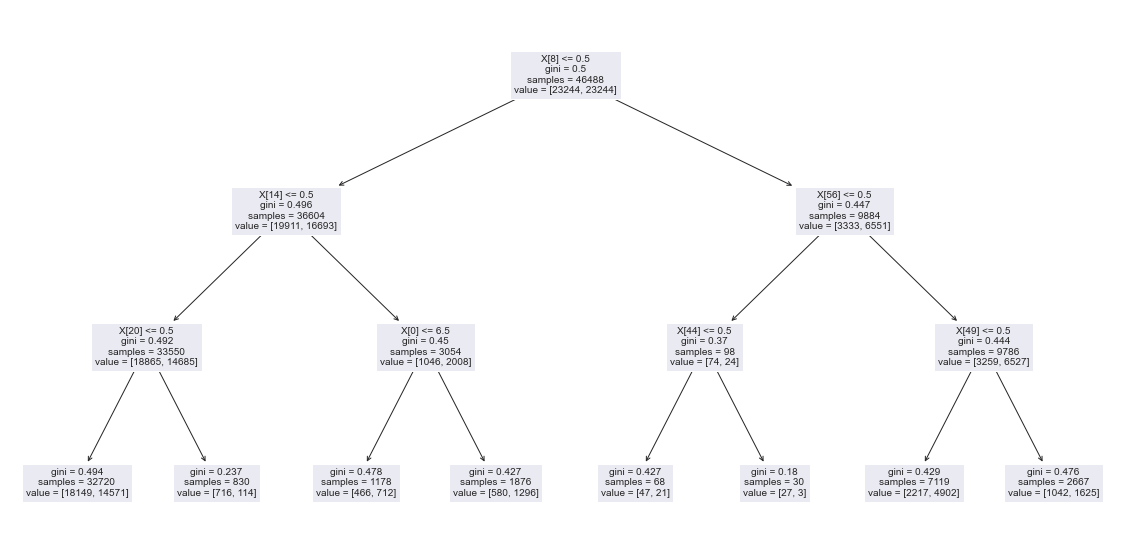

In [25]:
#here i make the desicion tree with the best parameters
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state = 42)
tree_clfFit = tree_clf.fit(train_X,train_y)
plt.figure(figsize=(20,10))
tree.plot_tree(tree_clfFit, fontsize=10)

### Evaluation

In [37]:
#here i first check what the percentage is with no delay so i dont get the wrong idea drom the accurately score
total=FinalDF_under.DelayOrNot.count()
delay=FinalDF_under.DelayOrNot.sum()
percentNoDelay=1-delay/total
print('percentage with no delay is',percentNoDelay)

percentage with no delay is 0.5


Like expected, now i down sampled the data there is an equal amoutn fo delays and no delays.

In [38]:
#here i iimport metrics and accuracy score
from sklearn import metrics
from sklearn.metrics import accuracy_score
#and give the accuracy score for this model
y_pred = tree_clf.predict(X_test_train)
accuracy_score(y_test_train, y_pred)

0.5848569584856959

The accuacy score is 58% which is worse then the models where i didnt add the extra column so it seems like the extra column isnt making a positive inpact, but to know that for sure i would have to look at the classification report and the cross validation scores

In [39]:
#here i import the classification report
from sklearn.metrics import classification_report
#here i print the classification report
target_names = ['class 1', 'class 2']
print(classification_report(y_test_train, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.56      0.81      0.66      4633
     class 2       0.66      0.36      0.46      4665

    accuracy                           0.58      9298
   macro avg       0.61      0.59      0.56      9298
weighted avg       0.61      0.58      0.56      9298



for the precision these results are more balanced then the one without the model, but the recall is worse.

In [40]:
#here i import the cross validation score
from sklearn.model_selection import cross_val_score
#and then firstly print the seperate scores and also the mean overall score
print(cross_val_score(tree_clf, train_X, train_y, cv=5))
cross_val_score(tree_clf, train_X, train_y, cv=5).mean()

[0.58733061 0.58905141 0.58173801 0.59901043 0.59696676]


0.5908194445514507

the cross validation score is pretty much the same. 

## Random forest part 1

In [46]:
#here i show the result form the gridsearch for the random forest model that i run in the kernel via a python file
pd.read_csv("GridSearchRandomForest3.csv").drop('Unnamed: 0',axis=1)

,Best criterion,Best max_depth,Best n_estimators
0,entropy,8,70


In [47]:
#here i import the random forest classifier
from sklearn.ensemble import RandomForestClassifier
#here i used the outcomes from the gridsearch to get the best possible outcome from the random forest model
forest_clf = RandomForestClassifier(criterion='entropy', max_depth=8, random_state = 42, n_estimators = 70)
forest_clf.fit(train_X,train_y)
forest_clf

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=70,
                       random_state=42)

### Evaluation

In [48]:
#here i give the accuracy score for this model
y_pred1 = forest_clf.predict(X_test_train)
accuracy_score(y_test_train, y_pred1)

0.6376640137664014

the accuracy score of the random forest is better then the one of the desicion trees but still worse then the one of the decision trees without the column.

In [49]:
#here i print the classification report
target_names = ['class 1', 'class 2']
print(classification_report(y_test_train, y_pred1, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.62      0.70      0.66      4633
     class 2       0.66      0.58      0.62      4665

    accuracy                           0.64      9298
   macro avg       0.64      0.64      0.64      9298
weighted avg       0.64      0.64      0.64      9298



the scores of this model are a bit more ballanced but is overall still worse thent he score of the decision trees without the extra column.

In [50]:
#here i print the seperate cross validation scores and also the mean overall score
print(cross_val_score(forest_clf, train_X, train_y, cv=5))
cross_val_score(forest_clf, train_X, train_y, cv=5).mean()

[0.61518606 0.57679071 0.56345451 0.62482521 0.57480908]


0.5910131132349028

the overall score are pretty much the same to the decision trees without the extra column. jsut like the one of the descion trees with the extra column

## Conclusion
I realised while doing this that in a lot of cases you dont know if the train is going to arrive at the planned destination in advance and also because it doesnt improve the model. I will conclude that the model without this extra column is better. To improve on that model more I will try out other ways to down sample.